Name: **Luong Nguyen**  
Student ID: **1504210**  

## Introduction to Deep Learning 

### Session02: Train and use MNIST
____

**Import the packages needed for this assignment**

In [291]:
# import packages
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
import keras.preprocessing.image as image
import os

**Load data**

In [292]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

**Explore data**

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)

An example image


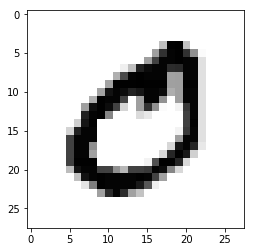

Corresponding label: 0


In [293]:
print("x_train shape: %s" % (str(x_train.shape)))
print("y_train shape: %s" % (str(y_train.shape)))
print("x_test shape: %s" % (str(x_test.shape)))
print("y_test shape: %s" % (str(y_test.shape)))

print("\nAn example image")
example_index = 21
digit_image = x_train[example_index]
digit_label = y_train[example_index]
plt.imshow(digit_image, cmap=plt.cm.binary)
plt.show()
print("Corresponding label: %d" % (digit_label))

**Load my test data**

Sample shape: (28, 28)


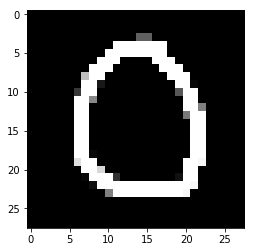

In [294]:
# load an example
my_digit = np.array(image.load_img('digits/0/0.4.png', target_size=(28, 28), grayscale=True))
print("Sample shape: " + str(my_digit.shape))
plt.imshow(my_digit, cmap=plt.cm.binary)
plt.show()

Sample shape: (28, 28)


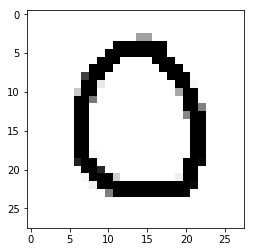

In [295]:
# Reverse black/white
my_digit = 255 - np.array(image.load_img('digits/0/0.4.png', target_size=(28, 28), grayscale=True))
print("Sample shape: " + str(my_digit.shape))
plt.imshow(my_digit, cmap=plt.cm.binary)
plt.show()

In [296]:
x_mytest = []
y_mytest = []

# https://stackoverflow.com/questions/25868109/python-read-all-files-in-directory-and-subdirectories
for root, directories, filenames in os.walk('digits'): 
    for filename in filenames: 
        file = os.path.join(root,filename)
        x_mytest.append(255 - np.array(image.load_img((file), target_size=(28, 28), grayscale=True)))
        y_mytest.append(int(file[7]))
        
x_mytest = np.array(x_mytest)
y_mytest = np.array(y_mytest)
print("x_mytest shape: %s" % (str(x_mytest.shape)))
print("y_mytest shape: %s" % (str(y_mytest.shape)))

x_mytest shape: (50, 28, 28)
y_mytest shape: (50,)


**Preprocess data**

In [297]:
# unroll image into a vector
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)
x_mytest = x_mytest.reshape(-1, 28 * 28)

# scaling all values into [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_mytest = x_mytest.astype('float32') / 255

# categorically encode the labels
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_mytest = to_categorical(y_mytest)

In [298]:
# Data shape after preprocessing
print("x_train shape: %s" % (str(x_train.shape)))
print("y_train shape: %s" % (str(y_train.shape)))
print("x_test shape: %s" % (str(x_test.shape)))
print("y_test shape: %s" % (str(y_test.shape)))
print("x_mytest shape: %s" % (str(x_mytest.shape)))
print("y_mytest shape: %s" % (str(y_mytest.shape)))

print("\nA sample of y_train: %s" % (str(y_train[example_index])))
print("\nA sample of y_mytest: %s" % (str(y_train[3])))

x_train shape: (60000, 784)
y_train shape: (60000, 10)
x_test shape: (10000, 784)
y_test shape: (10000, 10)
x_mytest shape: (50, 784)
y_mytest shape: (50, 10)

A sample of y_train: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

A sample of y_mytest: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


**Train with 1 layer network**

In [299]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(10, input_shape=(28 * 28,), activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [300]:
hist = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 56us/step - loss: 0.9843 - acc: 0.7746 - val_loss: 0.6012 - val_acc: 0.8642
Epoch 2/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.5541 - acc: 0.8642 - val_loss: 0.4772 - val_acc: 0.8819
Epoch 3/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.4738 - acc: 0.8782 - val_loss: 0.4265 - val_acc: 0.8909
Epoch 4/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.4347 - acc: 0.8860 - val_loss: 0.3980 - val_acc: 0.8971
Epoch 5/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.4106 - acc: 0.8899 - val_loss: 0.3794 - val_acc: 0.8993
Epoch 6/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.3936 - acc: 0.8940 - val_loss: 0.3656 - val_acc: 0.9023
Epoch 7/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.3809 - acc: 0.8962 - val_loss: 0.3556 - val_acc

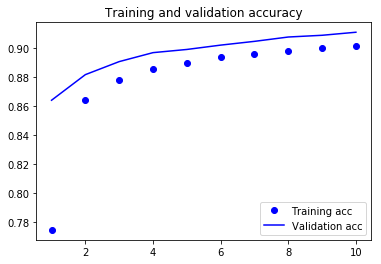

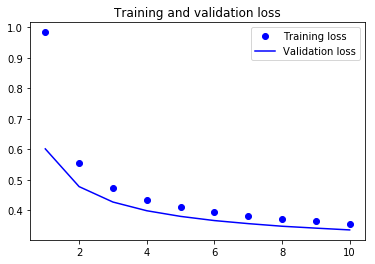

In [301]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [302]:
# evaluate on my test data
results = model.evaluate(x_mytest, y_mytest)
results

50/50 [==============================] - 0s 190us/step


[1.551092128753662, 0.52]

So this model achieve 48% accuracy on my test data. Should be higher if I have more data or the way I draw the number is closer to the training image data.

**Train with deep network**

In [303]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(100, input_shape=(28 * 28,), activation='relu'))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(25, activation='relu'))
model.add(keras.layers.Dense(25, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_28 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_29 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_30 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_31 (Dense)             (None, 25)                650       
_________________________________________________________________
dense_32 (Dense)             (None, 10)                260       
Total params: 88,285
Trainable params: 88,285
Non-trainable params: 0
_________________________________________________________________


In [304]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])

hist = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 95us/step - loss: 1.2579 - acc: 0.5998 - val_loss: 0.5216 - val_acc: 0.8472
Epoch 2/10
60000/60000 [==============================] - 4s 74us/step - loss: 0.3927 - acc: 0.8846 - val_loss: 0.3140 - val_acc: 0.9083
Epoch 3/10
60000/60000 [==============================] - 4s 75us/step - loss: 0.2872 - acc: 0.9145 - val_loss: 0.2496 - val_acc: 0.9255
Epoch 4/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.2305 - acc: 0.9323 - val_loss: 0.2253 - val_acc: 0.9327
Epoch 5/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.1938 - acc: 0.9433 - val_loss: 0.1836 - val_acc: 0.9453
Epoch 6/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.1667 - acc: 0.9511 - val_loss: 0.1763 - val_acc: 0.9452
Epoch 7/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.1471 - acc: 0.9568 - val_loss: 0.1614 - val_acc

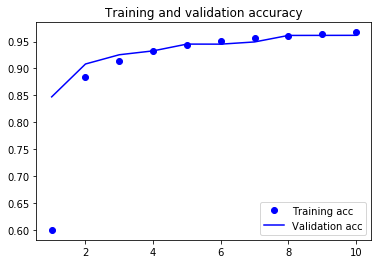

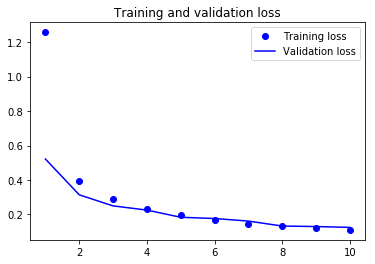

In [305]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [306]:
# evaluate on my test data
results = model.evaluate(x_mytest, y_mytest)
results

50/50 [==============================] - 0s 130us/step


[1.3180073404312134, 0.6200000095367432]

This deep network achieved higher accuracy on the validation set, but did not on my test set.

**Train with model from chapter 2 - Chollet book**

In [307]:
network = keras.models.Sequential()
network.add(keras.layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(keras.layers.Dense(10, activation='softmax'))
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_34 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [308]:
network.compile(optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

hist = network.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test,y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 152us/step - loss: 0.2523 - acc: 0.9255 - val_loss: 0.1208 - val_acc: 0.9619
Epoch 2/5
60000/60000 [==============================] - 8s 134us/step - loss: 0.1029 - acc: 0.9694 - val_loss: 0.0932 - val_acc: 0.9707
Epoch 3/5
60000/60000 [==============================] - 8s 139us/step - loss: 0.0677 - acc: 0.9795 - val_loss: 0.0772 - val_acc: 0.9763
Epoch 4/5
60000/60000 [==============================] - 8s 140us/step - loss: 0.0493 - acc: 0.9853 - val_loss: 0.0683 - val_acc: 0.9784
Epoch 5/5
60000/60000 [==============================] - 8s 136us/step - loss: 0.0373 - acc: 0.9888 - val_loss: 0.0691 - val_acc: 0.9794


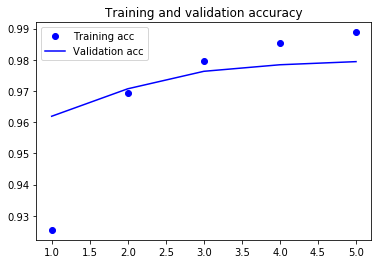

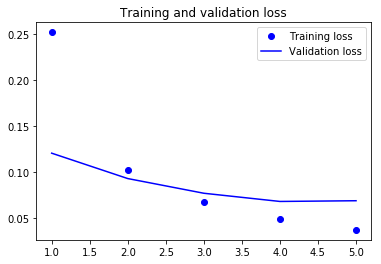

In [309]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [310]:
# evaluate on my test data
results = network.evaluate(x_mytest, y_mytest)
results

50/50 [==============================] - 0s 170us/step


[1.403551335334778, 0.5999999976158142]

This  network achieved higher accuracy on the validation set and also reach ~60% accuracy on my test set.